In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('data.csv')
df.head()

,review,Recommended IND
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad


In [3]:
print(df)

                                                 review Recommended IND
0     ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...             sad
1     সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...           angry
2     হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...           happy
3     স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...             sad
4     ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...             sad
...                                                 ...             ...
2838                         কাটা ছেরে আকাটা ভালো লাগলো           happy
2839  আব্বুর ধর্মের বিশ্বাসী মুসলমানদের ঈদের শুভেচ্ছ...       religious
2840     ঈদ মোবারক জানানোর সময় তোর এখন হল দিন শেষে শালী         abusive
2841  ঈদ বয়ে আনুক সবার জীবনে অনাবিল সুখ শান্তি ও সমৃ...           happy
2842             যাক বাবা ঈদ টাই মাটি হয়ে গেলো৷ দুর বাল           angry

[2843 rows x 2 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           2843 non-null   object
 1   Recommended IND  2843 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [7]:
df.shape

(2843, 2)

In [8]:
#type of variables
df.dtypes

review             object
Recommended IND    object
dtype: object

In [9]:
df['review'][1]

'সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এমনটা কথা আশা করি নি জাতির জনক কখনো বঙ্গবন্ধু হতে পারে না'

In [10]:
review = df[['review', 'Recommended IND']]
review.head()

,review,Recommended IND
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad


In [11]:
#columns rename
review = review.rename(columns={"Recommended IND": "Recommended", "review": "Review"})
review.head()

,Review,Recommended
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad


In [12]:
review.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [13]:
review.dropna(subset=['Review'], inplace=True)

In [14]:
review.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [15]:
review['Review'] = review['Review'].astype(str)

In [16]:
review.shape

(2843, 2)

In [17]:
review['Recommended'].value_counts()

happy        1005
excited       638
sad           467
angry         399
abusive       195
surprised      84
religious      55
Name: Recommended, dtype: int64

Text(0.5, 1.0, 'Proportion Target Class')

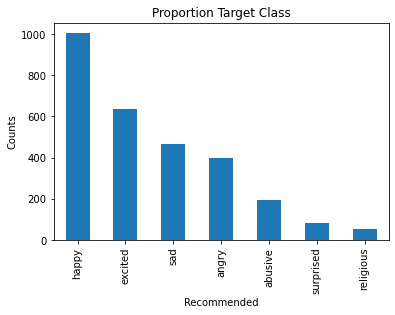

In [18]:
review["Recommended"].value_counts().plot(kind='bar')
plt.xlabel("Recommended")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

In [19]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [20]:
review['Review_clear'] = review['Review'].apply(tokens)
review.head()

,Review,Recommended,Review_clear
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad,
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry,
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy,
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad,
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad,


In [21]:
review['Review_clear'] = review['Review_clear'].astype(str)

In [22]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [23]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [24]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [25]:
review['Review_clear'] = review['Review_clear'].apply(stopwords)
review.head()

,Review,Recommended,Review_clear
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad,
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry,
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy,
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad,
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad,


In [26]:
review['Review_clear'][39]

''

In [27]:
def numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)    

In [28]:
review['Review_clear'] = review['Review_clear'].apply(numbers)
review.head()

,Review,Recommended,Review_clear
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad,
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry,
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy,
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad,
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad,


In [29]:
review['Review_clear'][39]

''

In [30]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
review['Review_clear'] = review['Review_clear'].apply(lemma)
review.head()

,Review,Recommended,Review_clear
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad,
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry,
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy,
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad,
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad,


In [33]:
review['Review_clear'][1]

''

In [34]:
ex = review[review.Recommended== "excited"]
hp = review[review.Recommended== "happy"]
m_r = review[review.Recommended== "religious"]
r = review[review.Recommended== "surprised"]
n = review[review.Recommended== "sad"]
n_r = review[review.Recommended== "abusive"]
m_n_r = review[review.Recommended== "angry"]

In [35]:
m_r.head()

,Review,Recommended,Review_clear
108,তুমি বরং বাবা কলকাতায় গিয়ে পুজো উদ্বোধন করো ...,religious,
114,মনেহয় আপনার উপর কালি মাতার অভিশাপ লেগে গেছে বল...,religious,
128,তুমি সাকিব আর আগের সাকিব নেই আস্তিক থেকে নাস্তিক,religious,
147,কোন অমুসলিমের মৃত্যুতে বলাটা অযোক্তিক তাই পরবর...,religious,
148,কিছু জান্নাতের টিকিটধারী আসবে ফতোয়া দেয়ার জন্য...,religious,


In [36]:
n_r.head()

,Review,Recommended,Review_clear
6,যদি রাত পোহালে সুনা যেতো বঙ্গবন্ধু মরে নাইইই ত...,abusive,
20,বেশি বেশি করে খান এতো টাকা পয়সা খাইবে কে ভাবির...,abusive,
112,ব্যবসা শেষ মাম্মা এভাবে চলতে থাকলে আইপিএল দূরে...,abusive,
118,সাকিবালের কাহিনী বিসিবি না বুঝলেও অস্ট্রেলিয়া ...,abusive,
146,কিছু উজবুক এখানে ধর্ম জান্নাত জাহান্নাম মারাইত...,abusive,


In [37]:
X = review['Review']
y = review['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

In [38]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

455

# Logistic Regression

In [37]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

In [38]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.5606326889279437
              precision    recall  f1-score   support

     abusive       0.38      0.32      0.35        31
       angry       0.32      0.36      0.34        74
     excited       0.73      0.71      0.72       136
       happy       0.62      0.73      0.67       197
   religious       1.00      0.17      0.29        12
         sad       0.42      0.35      0.38       102
   surprised       0.50      0.18      0.26        17

    accuracy                           0.56       569
   macro avg       0.57      0.40      0.43       569
weighted avg       0.56      0.56      0.55       569



# Naive bayes

In [39]:
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [40]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.5606326889279437
              precision    recall  f1-score   support

     abusive       0.80      0.13      0.22        31
       angry       0.40      0.30      0.34        74
     excited       0.74      0.74      0.74       136
       happy       0.53      0.85      0.66       197
   religious       0.00      0.00      0.00        12
         sad       0.43      0.25      0.31       102
   surprised       0.00      0.00      0.00        17

    accuracy                           0.56       569
   macro avg       0.41      0.32      0.32       569
weighted avg       0.53      0.56      0.52       569



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine (SVM)

In [105]:
model_svm = Pipeline([('vect', CountVectorizer(min_df=3, ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm',SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3, random_state=42)),
                    ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_svm.predict(X_test)

print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.5861159929701231
              precision    recall  f1-score   support

     abusive       0.37      0.15      0.21        73
       angry       0.44      0.28      0.34       167
     excited       0.68      0.77      0.72       265
       happy       0.62      0.83      0.71       400
   religious       0.29      0.11      0.15        19
         sad       0.44      0.39      0.41       181
   surprised       1.00      0.06      0.11        33

    accuracy                           0.59      1138
   macro avg       0.55      0.37      0.38      1138
weighted avg       0.57      0.59      0.55      1138



In [52]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.5852372583479789
              precision    recall  f1-score   support

     abusive       0.88      0.23      0.36        31
       angry       0.37      0.30      0.33        74
     excited       0.67      0.77      0.72       136
       happy       0.60      0.81      0.69       197
   religious       0.50      0.17      0.25        12
         sad       0.50      0.34      0.41       102
   surprised       0.50      0.12      0.19        17

    accuracy                           0.59       569
   macro avg       0.57      0.39      0.42       569
weighted avg       0.58      0.59      0.56       569



# logistic new acrcy

In [40]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

LR = LogisticRegression()
LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(classification_report(ytest, y_pred))


Logistic Regression
Accuracy Score: 57.90861159929701%
Confusion Matrix: 
[[ 12  19   3  23   0  16   0]
 [ 16  54  15  41   2  38   1]
 [  2   9 197  46   0  11   0]
 [  5  20  30 309   0  35   1]
 [  1   6   1   5   2   4   0]
 [  5  21  14  56   1  84   0]
 [  5  11   0  12   0   4   1]]
              precision    recall  f1-score   support

     abusive       0.26      0.16      0.20        73
       angry       0.39      0.32      0.35       167
     excited       0.76      0.74      0.75       265
       happy       0.63      0.77      0.69       400
   religious       0.40      0.11      0.17        19
         sad       0.44      0.46      0.45       181
   surprised       0.33      0.03      0.06        33

    accuracy                           0.58      1138
   macro avg       0.46      0.37      0.38      1138
weighted avg       0.56      0.58      0.56      1138



# Random Forest

In [101]:
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [102]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.5746924428822495
              precision    recall  f1-score   support

     abusive       0.36      0.26      0.30        31
       angry       0.40      0.34      0.37        74
     excited       0.71      0.76      0.73       136
       happy       0.58      0.79      0.67       197
   religious       0.25      0.08      0.12        12
         sad       0.51      0.31      0.39       102
   surprised       0.67      0.12      0.20        17

    accuracy                           0.57       569
   macro avg       0.50      0.38      0.40       569
weighted avg       0.56      0.57      0.55       569



# Which one is the best Model?

In [103]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
svm_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)

In [104]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 'Random Forest'],
                      'Score': [log_acc, nb_acc, svm_acc, rf_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,0.585237
3,Random Forest,0.574692
0,Logistic Regression,0.560633
1,Naive Bayes,0.560633


# LSTM

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

In [39]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(review['Review'].values)
X = tokenizer.texts_to_sequences(review['Review'].values)
X = pad_sequences(X)
X[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 308,  98, 914, 639,
        915,  86, 266, 496, 452],
       [ 22,   1,  18,  73,  76,   6, 164,  94,  27,  12, 453, 560, 640,
        327, 383, 288, 217,   2]])

In [40]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 18, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 7)                 1379      
                                                                 
Total params: 512,179
Trainable params: 512,179
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
Y = pd.get_dummies(review['Recommended']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 20)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2274, 18) (2274, 7)
(569, 18) (569, 7)


In [42]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
18/18 [==============================] - 3s 68ms/step - loss: 0.4918 - accuracy: 0.3232
Epoch 2/15
18/18 [==============================] - 1s 68ms/step - loss: 0.3603 - accuracy: 0.3597
Epoch 3/15
18/18 [==============================] - 1s 69ms/step - loss: 0.3552 - accuracy: 0.3668
Epoch 4/15
18/18 [==============================] - 1s 69ms/step - loss: 0.3456 - accuracy: 0.3764
Epoch 5/15
18/18 [==============================] - 1s 59ms/step - loss: 0.3292 - accuracy: 0.4406
Epoch 6/15
18/18 [==============================] - 1s 56ms/step - loss: 0.2917 - accuracy: 0.5519
Epoch 7/15
18/18 [==============================] - 1s 56ms/step - loss: 0.2442 - accuracy: 0.6653
Epoch 8/15
18/18 [==============================] - 1s 55ms/step - loss: 0.2076 - accuracy: 0.7102
Epoch 9/15
18/18 [==============================] - 1s 54ms/step - loss: 0.1829 - accuracy: 0.7454
Epoch 10/15
18/18 [==============================] - 1s 54ms/step - loss: 0.1619 - accuracy: 0.7858
Epoch 11/

In [43]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [44]:
print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.5536028119507909
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        40
           1       0.51      0.32      0.39        81
           2       0.82      0.80      0.81       123
           3       0.73      0.78      0.76       193
           4       0.00      0.00      0.00        15
           5       0.57      0.45      0.50        96
           6       0.00      0.00      0.00        21

   micro avg       0.70      0.56      0.62       569
   macro avg       0.52      0.34      0.36       569
weighted avg       0.66      0.56      0.57       569
 samples avg       0.56      0.56      0.56       569



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BiLSTM

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re
from tensorflow.keras.layers import LSTM,GRU,Bidirectional,Embedding,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard,ReduceLROnPlateau

In [38]:
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(review['Review'].values)
X = tokenizer.texts_to_sequences(review['Review'].values)
X = pad_sequences(X)
X[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 308,  98, 914, 639,
        915,  86, 266, 496, 452],
       [ 22,   1,  18,  73,  76,   6, 164,  94,  27,  12, 453, 560, 640,
        327, 383, 288, 217,   2]])

In [39]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
#model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(7,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 18, 128)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 392)              509600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 7)                 2751      
                                                                 
Total params: 768,351
Trainable params: 768,351
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
Y = pd.get_dummies(review['Recommended']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 20)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2274, 18) (2274, 7)
(569, 18) (569, 7)


In [41]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
18/18 [==============================] - 7s 162ms/step - loss: 0.4744 - accuracy: 0.3412
Epoch 2/15
18/18 [==============================] - 3s 146ms/step - loss: 0.3611 - accuracy: 0.3470
Epoch 3/15
18/18 [==============================] - 3s 145ms/step - loss: 0.3527 - accuracy: 0.3606
Epoch 4/15
18/18 [==============================] - 3s 145ms/step - loss: 0.3289 - accuracy: 0.4261
Epoch 5/15
18/18 [==============================] - 3s 142ms/step - loss: 0.2758 - accuracy: 0.5317
Epoch 6/15
18/18 [==============================] - 3s 141ms/step - loss: 0.2518 - accuracy: 0.5695
Epoch 7/15
18/18 [==============================] - 3s 148ms/step - loss: 0.2277 - accuracy: 0.6253
Epoch 8/15
18/18 [==============================] - 3s 143ms/step - loss: 0.1957 - accuracy: 0.6834
Epoch 9/15
18/18 [==============================] - 3s 142ms/step - loss: 0.1756 - accuracy: 0.7216
Epoch 10/15
18/18 [==============================] - 3s 141ms/step - loss: 0.1652 - accuracy: 0.7370

In [42]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [43]:

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.5588752196836555
              precision    recall  f1-score   support

           0       0.34      0.25      0.29        40
           1       0.54      0.26      0.35        81
           2       0.79      0.85      0.82       123
           3       0.82      0.66      0.73       193
           4       0.00      0.00      0.00        15
           5       0.54      0.58      0.56        96
           6       0.00      0.00      0.00        21

   micro avg       0.69      0.56      0.62       569
   macro avg       0.43      0.37      0.39       569
weighted avg       0.64      0.56      0.59       569
 samples avg       0.56      0.56      0.56       569



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# adaboost


In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [44]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.5061511423550088
              precision    recall  f1-score   support

     abusive       0.00      0.00      0.00        31
       angry       0.41      0.24      0.31        74
     excited       0.75      0.58      0.66       136
       happy       0.46      0.88      0.60       197
   religious       0.00      0.00      0.00        12
         sad       0.48      0.16      0.24       102
   surprised       0.40      0.12      0.18        17

    accuracy                           0.51       569
   macro avg       0.36      0.28      0.28       569
weighted avg       0.49      0.51      0.45       569



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [38]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
y_train_dtm = vect.transform(y_train) 
X_test_dtm = vect.transform(X_test)

#Accuracy using KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train_dtm, y_train)
y_pred = KNN.predict(X_test_dtm)
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
ytest = np.array(y_test)
print(classification_report(ytest, y_pred))


K Nearest Neighbors (NN = 3)
Accuracy Score: 43.7609841827768%
Confusion Matrix: 
[[ 50   6   1  11   0   5   0]
 [ 96  29   3  30   2   6   1]
 [ 55  30 134  39   0   7   0]
 [ 99  13  21 257   0  10   0]
 [ 10   4   0   3   0   2   0]
 [ 67  19  13  54   0  28   0]
 [ 19   3   0   8   1   2   0]]
              precision    recall  f1-score   support

     abusive       0.13      0.68      0.21        73
       angry       0.28      0.17      0.21       167
     excited       0.78      0.51      0.61       265
       happy       0.64      0.64      0.64       400
   religious       0.00      0.00      0.00        19
         sad       0.47      0.15      0.23       181
   surprised       0.00      0.00      0.00        33

    accuracy                           0.44      1138
   macro avg       0.33      0.31      0.27      1138
weighted avg       0.53      0.44      0.45      1138



# BERT

In [63]:
!pip install ktrain

  Using cached ktrain-0.28.3-py3-none-any.whl
  Using cached jieba-0.42.1-py3-none-any.whl
  Using cached langdetect-1.0.9-py3-none-any.whl
  Using cached cchardet-2.1.7-cp38-cp38-win_amd64.whl (115 kB)
  Using cached keras_bert-0.89.0-py3-none-any.whl
  Using cached fastprogress-1.0.0-py3-none-any.whl (12 kB)


In [37]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
      df.apply(np.random.shuffle, axis=axis)
    return df

In [38]:
data = pd.read_csv('b2.csv')



In [39]:
data.head()

,review,Recommended,r
0,ছাপ্পান্ন হাজার বর্গমাইল রাজ্যজুড়ে আজ কেবল বি...,sad,3FALSEFALSEFALSEFALSEFALSEFALSE
1,সাকিব ভাই আপনি একজন জ্ঞানী মানুষ আপনার কাছে এম...,angry,FALSE1FALSEFALSEFALSEFALSEFALSE
2,হাজার বছরের শেষ্ট বাঙালী জাতীর জনক ব্ঙ্গবন্ধু ...,happy,FALSEFALSEFALSEFALSEFALSE6FALSE
3,স্বাধীন বাংলাদেশের স্বপতিজাতির জনক বঙ্গবন্ধু শ...,sad,3FALSEFALSEFALSEFALSEFALSEFALSE
4,ঝরেনি সেদিন কৃষ্ণচুড়াঝরেছে পিতার রক্তআগষ্ট শো...,sad,3FALSEFALSEFALSEFALSEFALSEFALSE


In [40]:
data.sort_values(by='Recommended', axis=0, inplace=True)

data.set_index(keys=['Recommended'], drop=False,inplace=True)

emotions=review['Recommended'].unique().tolist()

In [41]:
sad = shuffle(data.loc[data.Recommended=='sad'])
angry = shuffle(data.loc[data.Recommended=='angry'])
happy = shuffle(data.loc[data.Recommended=='happy'])
excited = shuffle(data.loc[data.Recommended=='excited'])
abusive = shuffle(data.loc[data.Recommended=='abusive'])
religious = shuffle(data.loc[data.Recommended=='religious'])
surprised = shuffle(data.loc[data.Recommended=='surprised'])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\apply.py:276: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  results, res_index = self.apply_series_generator()


In [42]:
sad_train = sad.iloc[0:int(sad.shape[0]*0.8)]
sad_test = sad.iloc[int(sad.shape[0]*0.8)+1:sad.shape[0]]



In [43]:
angry_train = angry.iloc[0:int(angry.shape[0]*0.8)]
angry_test = angry.iloc[int(angry.shape[0]*0.8)+1:angry.shape[0]]

happy_train = happy.iloc[0:int(happy.shape[0]*0.8)]
happy_test = happy.iloc[int(happy.shape[0]*0.8)+1:happy.shape[0]]

excited_train = excited.iloc[0:int(excited.shape[0]*0.8)]
excited_test = excited.iloc[int(excited.shape[0]*0.8)+1:excited.shape[0]]

abusive_train = abusive.iloc[0:int(abusive.shape[0]*0.8)]
abusive_test = abusive.iloc[int(abusive.shape[0]*0.8)+1:abusive.shape[0]]

religious_train = religious.iloc[0:int(religious.shape[0]*0.8)]
religious_test = religious.iloc[int(religious.shape[0]*0.8)+1:religious.shape[0]]

surprised_train = surprised.iloc[0:int(surprised.shape[0]*0.8)]
surprised_test = surprised.iloc[int(surprised.shape[0]*0.8)+1:surprised.shape[0]]

data_train = pd.concat([sad_train, angry_train, happy_train, excited_train, abusive_train, religious_train, surprised_train])
data_test = pd.concat([sad_test, angry_test, happy_test, excited_test, abusive_test, religious_test,  surprised_test])

In [44]:
print(data_train.shape)
print(data_test.shape)

(2273, 3)
(563, 3)


In [45]:

X_train = data_train.review.tolist()
X_test = data_test.review.tolist()

In [46]:
data_train.head()

,review,Recommended,r
Recommended,,,
sad,বিপিএলে ২ ম্যাচ খেলিয়ে অার খেলায়নি,sad,3FALSEFALSEFALSEFALSEFALSEFALSE
sad,তখন হয়তো ততটা ম্যাচিউরড উঠছিলাম না তবুও কেন জ...,sad,3FALSEFALSEFALSEFALSEFALSEFALSE
sad,আপনাকে অনুসরণ করে ম্যাচ হেরে গেছি ব্রো,sad,3FALSEFALSEFALSEFALSEFALSEFALSE
sad,মিরপুরের এই পিচ টি টোয়েন্টির উপযুগি পিচ নয় অনে...,sad,3FALSEFALSEFALSEFALSEFALSEFALSE
sad,আমরা নারায়ণগঞ্জেবাসী গভীর ভাবে শোকাহত,sad,3FALSEFALSEFALSEFALSEFALSEFALSE


In [47]:
y_train = data_train.Recommended.tolist()
y_test = data_test.Recommended.tolist()

In [48]:
data = data_train.append(data_test, ignore_index=True)

class_names = ['sad', 'angry', 'happy', 'surprised', 'excited', 'religious', 'abusive']

print('size of training set: %s' % (len(data_train['review'])))
print('size of validation set: %s' % (len(data_test['review'])))
print(data.Recommended.value_counts())

size of training set: 2273
size of validation set: 563
happy        1004
excited       637
sad           466
angry         398
abusive       194
surprised      83
religious      54
Name: Recommended, dtype: int64


In [49]:
encoding = {
    'sad': 0,
    'happy': 1,
    'surprised': 2,
    'angry': 3,
    'religious': 4,
    'excited' : 5,
    'abusive' : 6
}

In [50]:
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [51]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=135000)


preprocessing train...
language: bn


Is Multi-Label? False
preprocessing test...
language: bn


task: text classification


In [52]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


In [109]:
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard
import os

In [110]:
basedir = "/content/logs/"
logdir = os.path.join("/content/logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
tf.debugging.experimental.enable_dump_debug_info(logdir)

In [111]:
callbacks = [
ModelCheckpoint(filepath=basedir+'checkpoint1-{epoch:02d}.hdf5', verbose=2, save_best_only=True, monitor='accuracy',mode='max'),
CSVLogger(basedir+'model_1trainanalysis1.csv',separator=',', append=False),
EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=1, verbose=2, mode='auto'),
TensorBoard(log_dir=logdir,histogram_freq=1)]

In [112]:
learner.fit_onecycle(2e-5, 2, callbacks = callbacks)

learner.validate(val_data=(x_test, y_test), class_names=class_names)

predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()



begin training using onecycle policy with max lr of 2e-05...


C:\Users\User\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/2
379/379 [==============================] - ETA: 0s - loss: 1.4704 - accuracy: 0.4501
Epoch 00001: accuracy improved from -inf to 0.45007, saving model to /content/logs\checkpoint1-01.hdf5
379/379 [==============================] - 3917s 10s/step - loss: 1.4704 - accuracy: 0.4501 - val_loss: 1.2438 - val_accuracy: 0.5560
Epoch 2/2
379/379 [==============================] - ETA: 0s - loss: 0.9383 - accuracy: 0.6555
Epoch 00002: accuracy improved from 0.45007 to 0.65552, saving model to /content/logs\checkpoint1-02.hdf5
379/379 [==============================] - 3512s 9s/step - loss: 0.9383 - accuracy: 0.6555 - val_loss: 0.9340 - val_accuracy: 0.6607
              precision    recall  f1-score   support

         sad       0.49      0.53      0.51        93
       angry       0.77      0.80      0.79       200
       happy       0.83      0.31      0.45        16
   surprised       0.43      0.61      0.51        79
     excited       0.00      0.00      0.00        10
   religi

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average_options = (None, 'micro', 'macro', 'weighted', 'samples')
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average_options = (None, 'micro', 'macro', 'weighted', 'samples')
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average_options = (None, 'micro', 'macro', 'weighted', 'samples')


['sad', 'angry', 'happy', 'surprised', 'excited', 'religious', 'abusive']

In [114]:
from sklearn.metrics import precision_recall_fscore_support

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

print(precision_recall_fscore_support(data_test.Recommended, predictions, average='weighted'))

(0.1176464397477603, 0.1172291296625222, 0.10675821555079107, None)


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average_options = (None, 'micro', 'macro', 'weighted', 'samples')


In [115]:
import time 

message = 'Test Message'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predictor.save("models/bert_model")

predicted: angry (1.16)


C:\Users\User\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
